In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import os,sys,inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import ipywidgets as widgets
from IPython.display import display

In [2]:
import quantstats as qs
qs.extend_pandas()

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
from db.models import TickerReturn, Ticker
from db.configuration import database_connection

In [4]:
query = TickerReturn.select(
    TickerReturn.datetime.alias("Date"),
    TickerReturn.close.alias("Close"),
).where(
    TickerReturn.ticker == Ticker.get(Ticker.ticker == 'SHOP'),
    TickerReturn.interval == '1d'
).order_by(TickerReturn.datetime.asc())

In [5]:
df = pd.read_sql(query.sql()[0], database_connection(),
                                params=query.sql()[1],
                                index_col='Date'
                                )

In [6]:
df.columns

Index(['Close'], dtype='object')

In [7]:
ser = df.T.squeeze()
ser_pct_change = ser.pct_change()

In [8]:
ser_pct_change.sharpe()

1.580408003186691

In [9]:
ser_pct_change

Date
2015-10-01         NaN
2015-10-02    0.021101
2015-10-05    0.026529
2015-10-06   -0.014962
2015-10-07    0.030931
                ...   
2020-12-18   -0.007661
2020-12-21    0.022460
2020-12-22    0.066669
2020-12-23   -0.061954
2020-12-24    0.023006
Name: Close, Length: 1319, dtype: float64

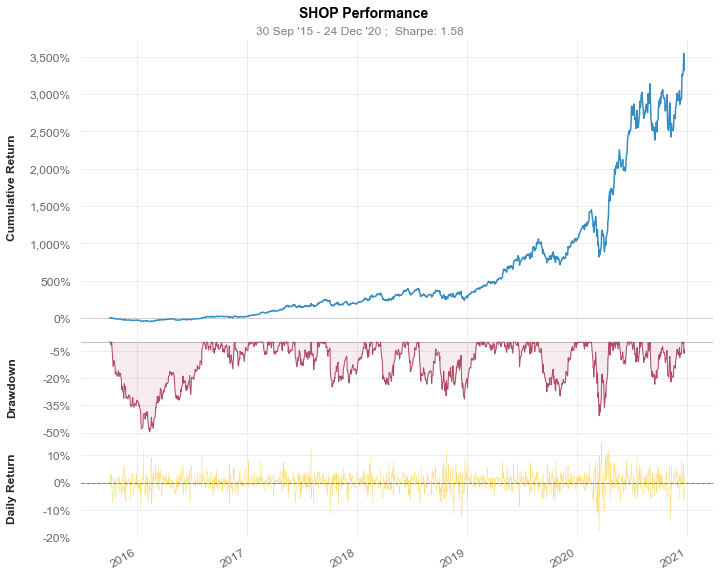

In [10]:
qs.plots.snapshot(ser_pct_change, title='SHOP Performance')

                           Strategy
-------------------------  ----------
Start Period               2015-10-01
End Period                 2020-12-24
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          3,394.50%
CAGR%                      97.14%
Sharpe                     1.58
Sortino                    2.36
Max Drawdown               -49.45%
Longest DD Days            304
Volatility (ann.)          51.39%
Calmar                     1.96
Skew                       -0.17
Kurtosis                   2.32

Expected Daily %           0.27%
Expected Monthly %         5.8%
Expected Yearly %          80.81%
Kelly Criterion            13.27%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.0%
Expected Shortfall (cVaR)  -5.0%

Payoff Ratio               1.04
Profit Factor              1.31
Common Sense Ratio         1.39
CPC Index                  0.76
Tail Ratio                 1.06
Outlier Win Ratio          3.63
Outlier Loss Ratio        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-10-09,2016-02-12,2016-08-08,304,-49.450837,-47.986402
2,2020-02-20,2020-03-16,2020-04-17,57,-40.669355,-38.789789
3,2018-07-26,2018-12-24,2019-02-08,197,-31.465071,-29.560364
4,2019-08-28,2019-11-07,2019-12-26,120,-29.789428,-27.511733
5,2017-09-20,2017-10-10,2018-01-25,127,-24.703107,-23.360989


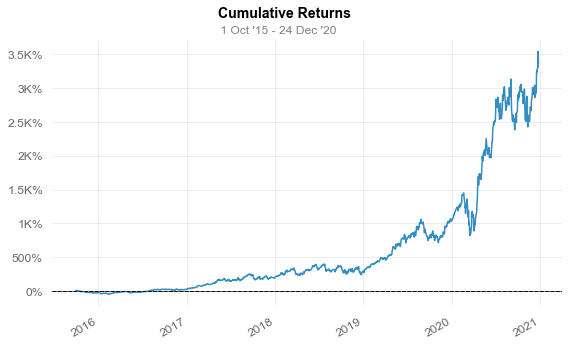

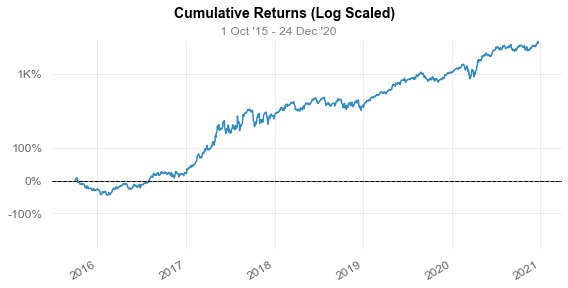

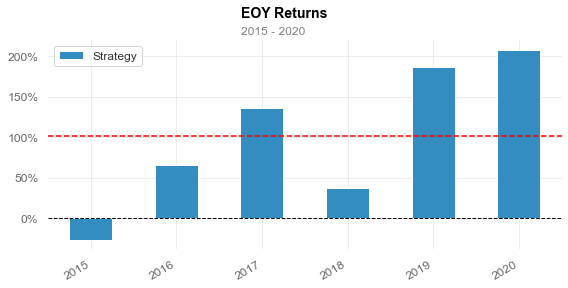

/Users/ignar/Library/Caches/pypoetry/virtualenvs/trade-tAnE1wze-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


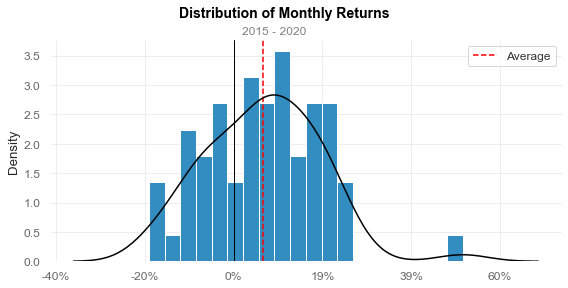

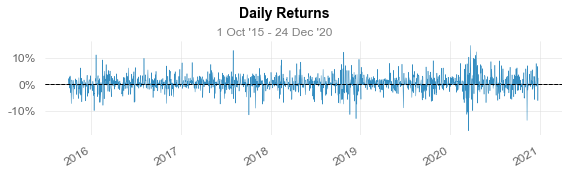

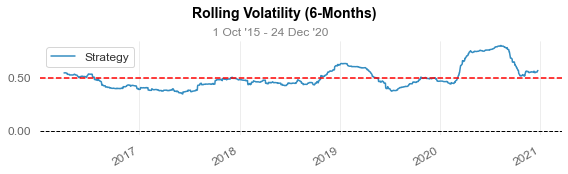

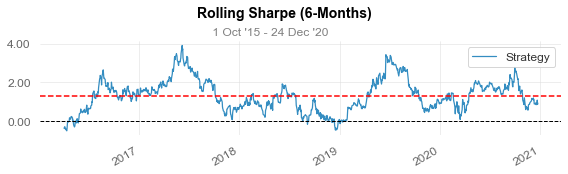

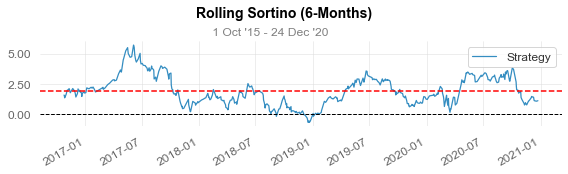

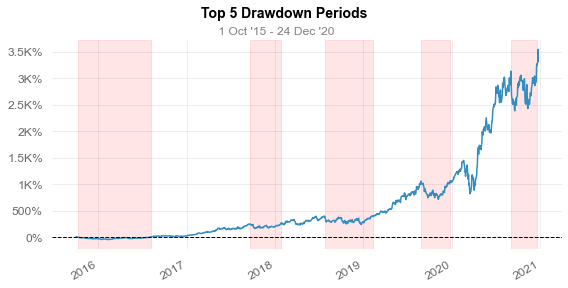

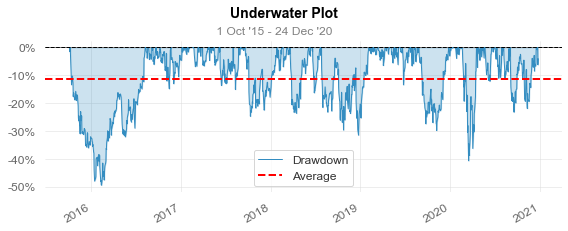

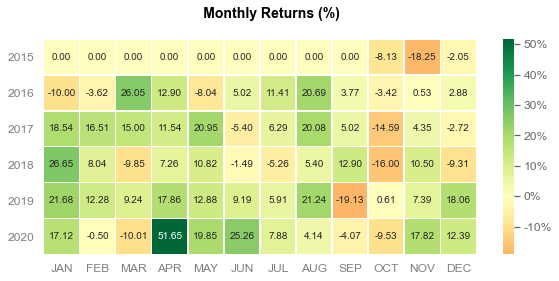

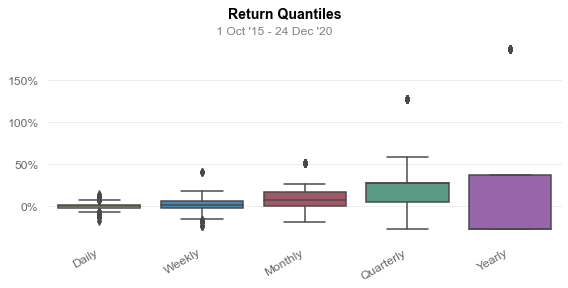

In [11]:
qs.reports.full(ser_pct_change)

In [12]:
import pendulum
start_period = pendulum.naive(2019, 10, 1)

In [73]:
tickers_list = ["SHOP", "AC.TO", "MU", "PHM", "ENB", "IBKR", 
                "MSFT", "AAPL", "SPY", "TSLA", "SHOP.TO", "BABA", "PFE"]
exlist = ["SHOP", "AC.TO", "SHOP.TO", "QQQ", "AAPL"]
exlist = ["SHOP", "AC.TO", "SHOP.TO", "AAPL"]
exlist = tickers_list

In [74]:
tickers = Ticker.select().where(Ticker.ticker.in_(exlist))
base_query = TickerReturn.select(
    TickerReturn.datetime,
#     Ticker.ticker,
#     TickerReturn.id,
#     TickerReturn.open,
#     TickerReturn.high,
#     TickerReturn.low,
    TickerReturn.close,
#     TickerReturn.volume,
).where(
#     TickerReturn.ticker.in_(tickers),
    TickerReturn.interval == '1d',
    TickerReturn.datetime > start_period
).order_by(
    TickerReturn.datetime.asc()
).join(Ticker)

In [75]:
ticker_query = base_query.where(TickerReturn.ticker == Ticker.get(Ticker.ticker == "SHOP"))
dataframe = pd.read_sql(ticker_query.sql()[0], database_connection(),
    params=ticker_query.sql()[1],
    index_col='datetime'
)
pd.DataFrame({"SHOP": dataframe.close}, index=dataframe.index)

,SHOP
datetime,
2019-10-02,310.35999
2019-10-03,325.57001
2019-10-04,327.20001
2019-10-07,326.32001
2019-10-08,311.04999
...,...
2020-12-18,1170.95996
2020-12-21,1197.26001
2020-12-22,1277.07996


In [76]:
dataframes = []
for ticker in exlist:
    ticker_query = base_query.where(TickerReturn.ticker == Ticker.get(Ticker.ticker == ticker))
    dataframe = pd.read_sql(ticker_query.sql()[0], database_connection(),
        params=ticker_query.sql()[1],
        index_col='datetime'
    )
    df = pd.DataFrame({ticker: dataframe.close}, index=dataframe.index)
    print(ticker)
    print(df.shape)
    dataframes.append(df)
dataframes = pd.concat(dataframes, axis=1).dropna()

SHOP
(312, 1)
AC.TO
(310, 1)
MU
(312, 1)
PHM
(312, 1)
ENB
(312, 1)
IBKR
(312, 1)
MSFT
(312, 1)
AAPL
(312, 1)
SPY
(312, 1)
TSLA
(312, 1)
SHOP.TO
(311, 1)
BABA
(312, 1)
PFE
(312, 1)


In [77]:
dataframes

,SHOP,AC.TO,MU,PHM,ENB,IBKR,MSFT,AAPL,SPY,TSLA,SHOP.TO,BABA,PFE
datetime,,,,,,,,,,,,,
2019-10-02,310.35999,42.54000,41.98000,36.22000,34.14000,47.31000,134.64999,54.74000,288.06000,48.62600,412.87000,165.77000,32.92220
2019-10-03,325.57001,43.10000,43.46000,36.17000,34.36000,46.89000,136.28000,55.20500,290.42001,46.60600,434.16000,169.48000,33.63378
2019-10-04,327.20001,43.27000,44.55000,37.09000,34.80000,47.59000,138.12000,56.75250,294.35001,46.28600,435.53000,170.34000,34.08918
2019-10-07,326.32001,43.24000,44.16000,36.75000,34.80000,47.59000,137.12000,56.76500,293.07999,47.54400,433.98999,168.32001,33.99431
2019-10-08,311.04999,42.88000,42.64000,36.62000,34.78000,47.59000,135.67000,56.10000,288.53000,48.01000,414.39001,161.92999,33.61480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,1170.95996,23.06000,71.46000,45.10000,32.79000,59.15000,218.59000,126.66000,369.17999,695.00000,1500.92004,260.00000,37.68000
2020-12-21,1197.26001,22.50000,71.47000,44.75000,32.33000,58.92000,222.59000,128.23000,367.85999,649.85999,1537.43994,260.42999,37.38000
2020-12-22,1277.07996,22.07000,70.44000,45.41000,31.90000,60.44000,223.94000,131.88000,367.23999,640.34003,1649.22998,255.83000,36.74000


In [78]:
ticker_returns = dataframes.pct_change().dropna()

In [79]:
ticker_returns

,SHOP,AC.TO,MU,PHM,ENB,IBKR,MSFT,AAPL,SPY,TSLA,SHOP.TO,BABA,PFE
datetime,,,,,,,,,,,,,
2019-10-03,0.04901,0.01316,0.03525,-0.00138,0.00644,-0.00888,0.01211,0.00849,0.00819,-0.04154,0.05157,0.02238,0.02161
2019-10-04,0.00501,0.00394,0.02508,0.02544,0.01281,0.01493,0.01350,0.02803,0.01353,-0.00687,0.00316,0.00507,0.01354
2019-10-07,-0.00269,-0.00069,-0.00875,-0.00917,0.00000,0.00000,-0.00724,0.00022,-0.00431,0.02718,-0.00354,-0.01186,-0.00278
2019-10-08,-0.04679,-0.00833,-0.03442,-0.00354,-0.00057,0.00000,-0.01057,-0.01171,-0.01552,0.00980,-0.04516,-0.03796,-0.01116
2019-10-09,0.00900,0.01819,0.00563,0.00765,0.01121,-0.04497,0.01894,0.01172,0.00950,0.01866,0.01028,0.02013,0.00734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,-0.00766,-0.02453,-0.01107,0.00715,-0.01056,-0.01712,-0.00378,-0.01585,-0.00822,0.05961,-0.00388,-0.01675,-0.00920
2020-12-21,0.02246,-0.02428,0.00014,-0.00776,-0.01403,-0.00389,0.01830,0.01240,-0.00358,-0.06495,0.02433,0.00165,-0.00796
2020-12-22,0.06667,-0.01911,-0.01441,0.01475,-0.01330,0.02580,0.00606,0.02846,-0.00169,-0.01465,0.07271,-0.01766,-0.01712


In [80]:
covmatrix = ticker_returns.cov()

In [81]:
n, m = covmatrix.shape
weights = np.repeat(0.25, n)

In [82]:
from jupiter_notebooks import edhec_risk_kit as erk

In [83]:
n, m = ticker_returns.shape
er = erk.annualize_rets(ticker_returns, n)

In [84]:
er

SHOP       2.94870
AC.TO     -0.46239
MU         0.68128
PHM        0.24793
ENB       -0.05712
IBKR       0.29106
MSFT       0.65429
AAPL       1.41085
SPY        0.28098
TSLA      12.60939
SHOP.TO    2.79827
BABA       0.33920
PFE        0.13206
dtype: float64

In [85]:
erk.portfolio_return(weights, er)

5.468626785852926

In [86]:
erk.portfolio_vol(weights, covmatrix)

0.07469335252114749

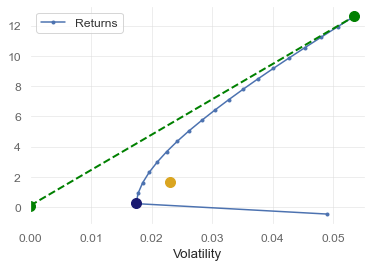

In [92]:
erk.plot_ef(20, er, covmatrix, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [88]:
w_gmv = erk.gmv(covmatrix)
r_gmv = erk.portfolio_return(w_gmv, er)
vol_gmv = erk.portfolio_vol(w_gmv, covmatrix)

In [89]:
pd.DataFrame(index=[exlist], data=w_gmv, columns=[["Weights"]])

,Weights
SHOP,0.00000
AC.TO,0.00000
MU,0.00000
PHM,0.00000
ENB,0.00000
IBKR,0.07117
MSFT,0.00000
AAPL,0.00000
SPY,0.31144
TSLA,0.00000


In [90]:
r_gmv, vol_gmv

(0.2501985061496851, 0.01738433885530932)

In [94]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [117]:
ticker_returns

,SHOP,AC.TO,MU,PHM,ENB,IBKR,MSFT,AAPL,SPY,TSLA,SHOP.TO,BABA,PFE
datetime,,,,,,,,,,,,,
2019-10-03,0.04901,0.01316,0.03525,-0.00138,0.00644,-0.00888,0.01211,0.00849,0.00819,-0.04154,0.05157,0.02238,0.02161
2019-10-04,0.00501,0.00394,0.02508,0.02544,0.01281,0.01493,0.01350,0.02803,0.01353,-0.00687,0.00316,0.00507,0.01354
2019-10-07,-0.00269,-0.00069,-0.00875,-0.00917,0.00000,0.00000,-0.00724,0.00022,-0.00431,0.02718,-0.00354,-0.01186,-0.00278
2019-10-08,-0.04679,-0.00833,-0.03442,-0.00354,-0.00057,0.00000,-0.01057,-0.01171,-0.01552,0.00980,-0.04516,-0.03796,-0.01116
2019-10-09,0.00900,0.01819,0.00563,0.00765,0.01121,-0.04497,0.01894,0.01172,0.00950,0.01866,0.01028,0.02013,0.00734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,-0.00766,-0.02453,-0.01107,0.00715,-0.01056,-0.01712,-0.00378,-0.01585,-0.00822,0.05961,-0.00388,-0.01675,-0.00920
2020-12-21,0.02246,-0.02428,0.00014,-0.00776,-0.01403,-0.00389,0.01830,0.01240,-0.00358,-0.06495,0.02433,0.00165,-0.00796
2020-12-22,0.06667,-0.01911,-0.01441,0.01475,-0.01330,0.02580,0.00606,0.02846,-0.00169,-0.01465,0.07271,-0.01766,-0.01712


In [147]:
mu = expected_returns.return_model(dataframes, method="capm_return")
S = risk_models.risk_matrix(dataframes, method="oracle_approximating")

In [148]:
S

,SHOP,AC.TO,MU,PHM,ENB,IBKR,MSFT,AAPL,SPY,TSLA,SHOP.TO,BABA,PFE
SHOP,0.41398,0.05187,0.15069,0.15386,0.10449,0.08276,0.16039,0.14915,0.10211,0.24718,0.39340,0.08946,0.05800
AC.TO,0.05187,0.59383,0.18854,0.23780,0.18001,0.13586,0.08124,0.08804,0.12147,0.16981,0.02496,0.07611,0.09514
MU,0.15069,0.18854,0.29749,0.16045,0.13383,0.12235,0.14442,0.13472,0.12446,0.17432,0.13237,0.09116,0.07931
PHM,0.15386,0.23780,0.16045,0.37463,0.15508,0.12943,0.11178,0.12195,0.12074,0.18732,0.13518,0.07517,0.05648
ENB,0.10449,0.18001,0.13383,0.15508,0.20003,0.10895,0.10903,0.10718,0.10268,0.13668,0.08547,0.06141,0.07010
IBKR,0.08276,0.13586,0.12235,0.12943,0.10895,0.19337,0.09701,0.09603,0.08874,0.15135,0.06916,0.06262,0.04835
MSFT,0.16039,0.08124,0.14442,0.11178,0.10903,0.09701,0.16444,0.13993,0.10565,0.16492,0.14727,0.08575,0.07117
AAPL,0.14915,0.08804,0.13472,0.12195,0.10718,0.09603,0.13993,0.18317,0.10599,0.16185,0.13741,0.08215,0.06612
SPY,0.10211,0.12147,0.12446,0.12074,0.10268,0.08874,0.10565,0.10599,0.09824,0.11599,0.09025,0.06114,0.06517
TSLA,0.24718,0.16981,0.17432,0.18732,0.13668,0.15135,0.16492,0.16185,0.11599,0.70886,0.21484,0.10854,0.04689


In [149]:
mu

SHOP      0.98089
AC.TO     0.93058
MU        0.88119
PHM       0.91950
ENB       0.71183
IBKR      0.63635
MSFT      0.72436
AAPL      0.72021
SPY       0.59913
TSLA      1.17352
SHOP.TO   0.89459
BABA      0.49419
PFE       0.40456
Name: mkt, dtype: float64

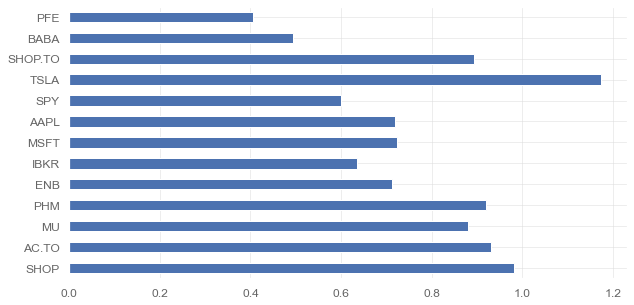

In [150]:
mu.plot.barh(figsize=(10,5))

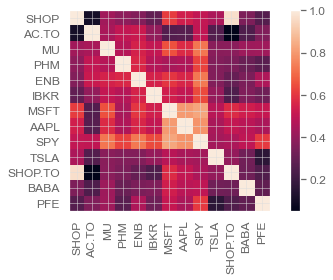

In [151]:
from pypfopt import plotting
plotting.plot_covariance(S, plot_correlation=True);

In [152]:
ef = EfficientFrontier(mu, S)

In [153]:
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

In [154]:
raw_weights

OrderedDict([('SHOP', 0.0791165404932738),
             ('AC.TO', 0.0779039497350865),
             ('MU', 0.0783183450266976),
             ('PHM', 0.07779256806967),
             ('ENB', 0.0773731499716039),
             ('IBKR', 0.0766952527052575),
             ('MSFT', 0.0793182723710837),
             ('AAPL', 0.0781584829575497),
             ('SPY', 0.0715395386243037),
             ('TSLA', 0.0774437621544431),
             ('SHOP.TO', 0.0755551729972601),
             ('BABA', 0.0754956265268135),
             ('PFE', 0.0752893383669568)])

In [155]:
cleaned_weights

OrderedDict([('SHOP', 0.07912),
             ('AC.TO', 0.0779),
             ('MU', 0.07832),
             ('PHM', 0.07779),
             ('ENB', 0.07737),
             ('IBKR', 0.0767),
             ('MSFT', 0.07932),
             ('AAPL', 0.07816),
             ('SPY', 0.07154),
             ('TSLA', 0.07744),
             ('SHOP.TO', 0.07556),
             ('BABA', 0.0755),
             ('PFE', 0.07529)])

In [156]:
ef.portfolio_performance(verbose=True)

Expected annual return: 77.7%
Annual volatility: 36.2%
Sharpe Ratio: 2.09


(0.7773720921327046, 0.36244320466331553, 2.0896297196032423)